<h1><center>Heart Failure Prediction</center></h1>

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

<br>Total: 1190 observations
<br>Duplicated: 272 observations
<br>Final dataset: 918 observations

Attribute Information

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

The data is taken from https://www.kaggle.com/fedesoriano/heart-failure-prediction

The goal of this project is to use the dataset to predict heart failure.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h2>Reading the data</h2>

Double-click <b>here</b> to see the reading of the data from Kaggle.
<!--
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()
-->

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<h2>Explore the data</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Get a statistical summary of each column with type integer
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

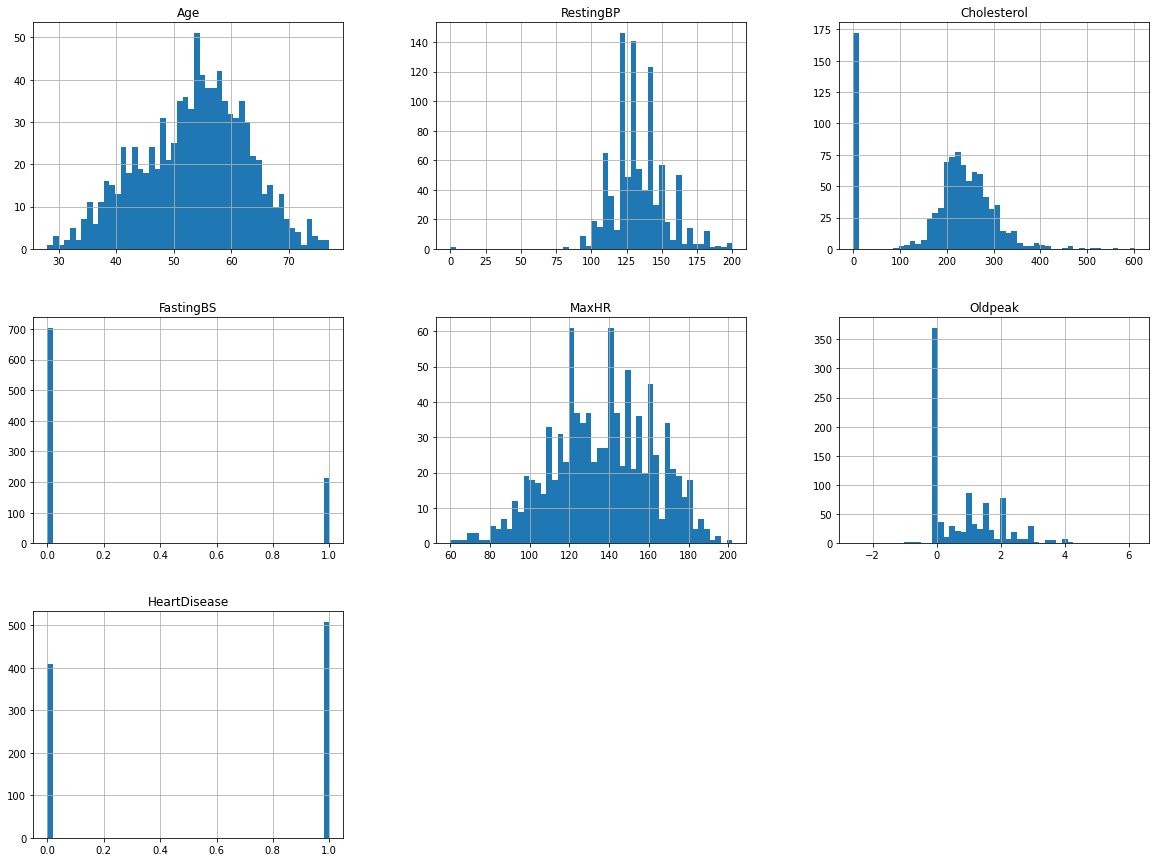

In [6]:
# Plot a histogram for each numerical attribute
df_int = df[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]]
df_int.hist(bins=50, figsize=(20,15))

In [7]:
# Check the number of people with very low cholesterol
df_int.loc[df_int.Cholesterol < 50]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
293,65,115,0,0,93,0.0,1
294,32,95,0,1,127,0.7,1
295,61,105,0,1,110,1.5,1
296,50,145,0,1,139,0.7,1
297,57,110,0,1,131,1.4,1
...,...,...,...,...,...,...,...
514,43,122,0,0,120,0.5,1
515,63,130,0,1,160,3.0,0
518,48,102,0,1,110,1.0,1
535,56,130,0,0,122,1.0,1


In [8]:
# Count the value of "Oldpeak"
df_int["Oldpeak"].value_counts().head()

0.0    368
1.0     86
2.0     76
1.5     53
3.0     28
Name: Oldpeak, dtype: int64

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


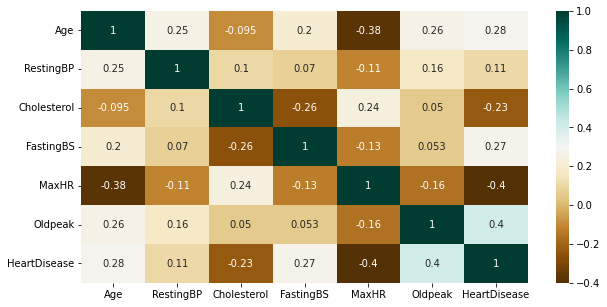

In [9]:
# Check the correlation (Pearson Correlation) between variables
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

It seems that the linear correllation between the integere variables is not very strong, since they are between -0.4 and 0.28. 

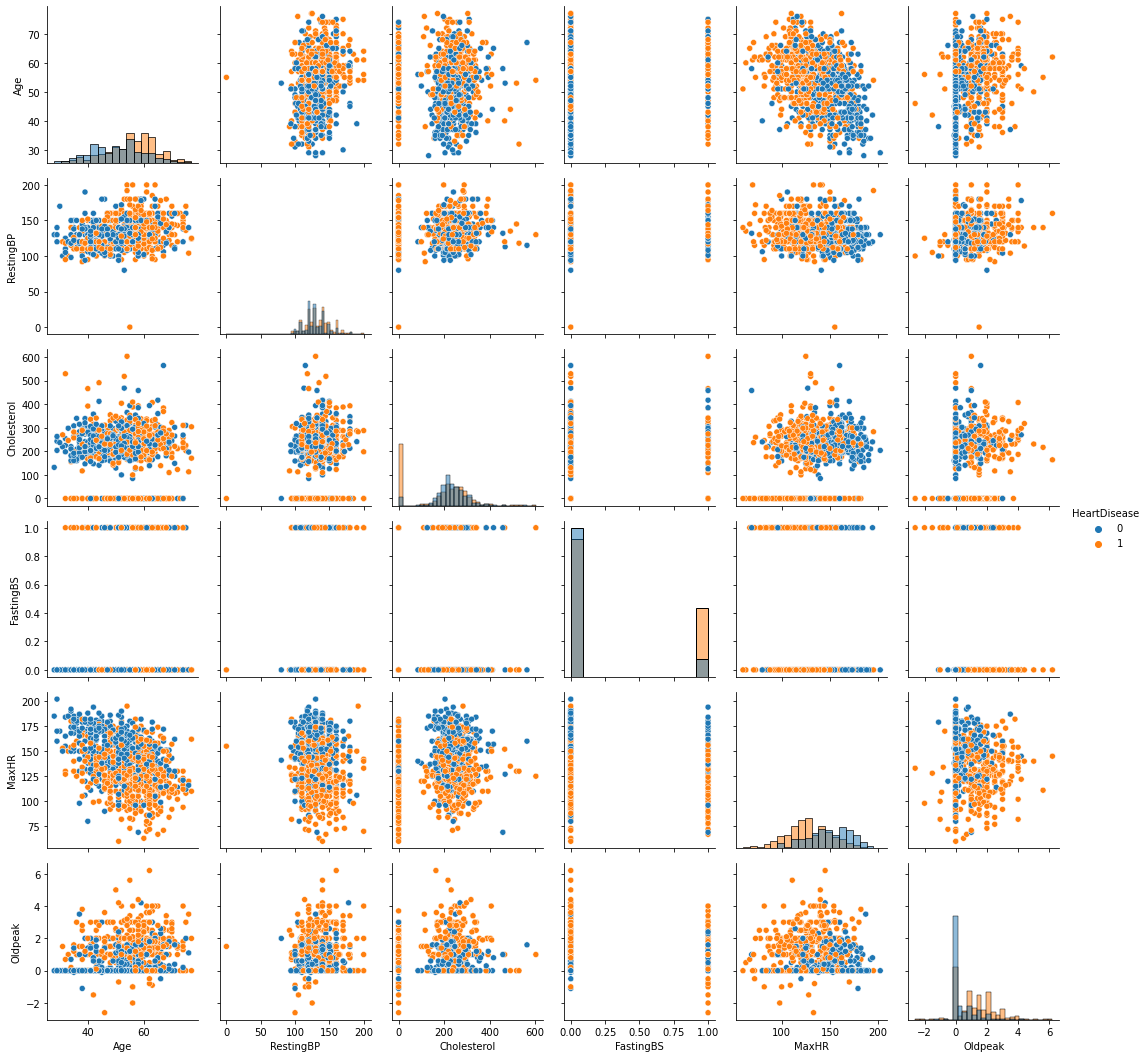

In [10]:
# Let us look at the distribution of the HeartDisease based on some variables of the dataset
g = sns.PairGrid(df_int, hue="HeartDisease")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

This confirms the result from the previous heat map that the linear correllation between the integere variables is not very strong. It is difficult to speciy specific features which can be used to predict Heart Disease.

Let's look the above distribution more closely, limiting the dataset to only 50 rows.

<Figure size 432x288 with 0 Axes>

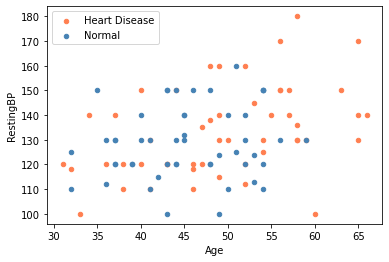

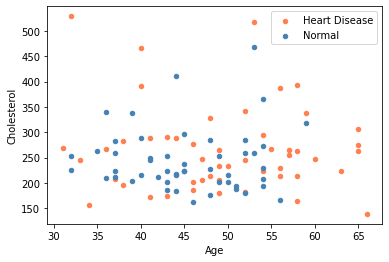

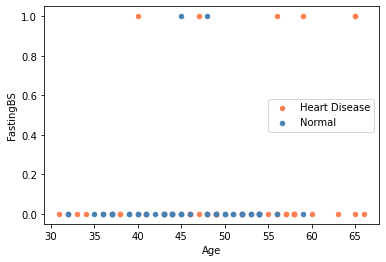

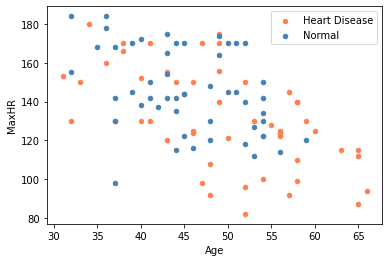

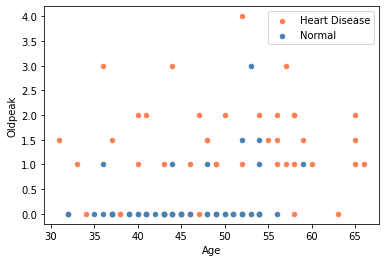

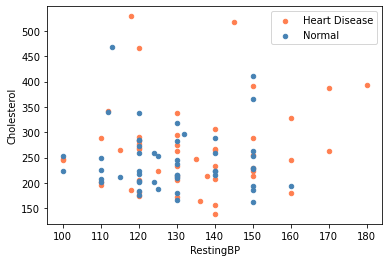

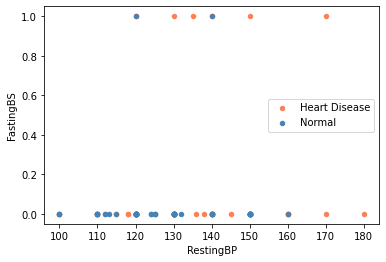

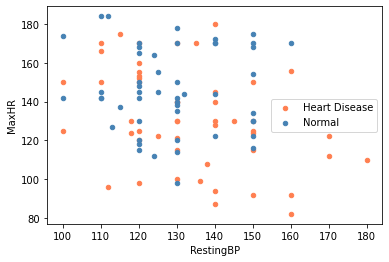

In [11]:
#fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6],  [ax7, ax8]) = plt.subplots(4, 2, figsize=(25,20))
fig = plt.figure()
#ax1=fig.add_subplot(421)
#ax2=fig.add_subplot(422)
#ax3=fig.add_subplot(423)
#ax4=fig.add_subplot(424)
#ax5=fig.add_subplot(425)
#ax6=fig.add_subplot(426)
#ax7=fig.add_subplot(427)
#ax8=fig.add_subplot(428)

ax1 = df[df['HeartDisease'] == 1][0:50].plot(kind='scatter', x='Age', y='RestingBP', color='Coral', label='Heart Disease');
df[df['HeartDisease'] == 0][0:50].plot(kind='scatter', x='Age', y='RestingBP', color='SteelBlue', label='Normal', ax=ax1);

ax2 = df[df['HeartDisease'] == 1][0:50].plot(kind='scatter', x='Age', y='Cholesterol', color='Coral', label='Heart Disease');
df[df['HeartDisease'] == 0][0:50].plot(kind='scatter', x='Age', y='Cholesterol', color='SteelBlue', label='Normal', ax=ax2);

ax3 = df[df['HeartDisease'] == 1][0:50].plot(kind='scatter', x='Age', y='FastingBS', color='Coral', label='Heart Disease');
df[df['HeartDisease'] == 0][0:50].plot(kind='scatter', x='Age', y='FastingBS', color='SteelBlue', label='Normal', ax=ax3);

ax4 = df[df['HeartDisease'] == 1][0:50].plot(kind='scatter', x='Age', y='MaxHR', color='Coral', label='Heart Disease');
df[df['HeartDisease'] == 0][0:50].plot(kind='scatter', x='Age', y='MaxHR', color='SteelBlue', label='Normal', ax=ax4);

ax5 = df[df['HeartDisease'] == 1][0:50].plot(kind='scatter', x='Age', y='Oldpeak', color='Coral', label='Heart Disease');
df[df['HeartDisease'] == 0][0:50].plot(kind='scatter', x='Age', y='Oldpeak', color='SteelBlue', label='Normal', ax=ax5);

ax6 = df[df['HeartDisease'] == 1][0:50].plot(kind='scatter', x='RestingBP', y='Cholesterol', color='Coral', label='Heart Disease');
df[df['HeartDisease'] == 0][0:50].plot(kind='scatter', x='RestingBP', y='Cholesterol', color='SteelBlue', label='Normal', ax=ax6);

ax7 = df[df['HeartDisease'] == 1][0:50].plot(kind='scatter', x='RestingBP', y='FastingBS', color='Coral', label='Heart Disease');
df[df['HeartDisease'] == 0][0:50].plot(kind='scatter', x='RestingBP', y='FastingBS', color='SteelBlue', label='Normal', ax=ax7);

ax8 = df[df['HeartDisease'] == 1][0:50].plot(kind='scatter', x='RestingBP', y='MaxHR', color='Coral', label='Heart Disease');
df[df['HeartDisease'] == 0][0:50].plot(kind='scatter', x='RestingBP', y='MaxHR', color='SteelBlue', label='Normal', ax=ax8);


In [12]:
# Get a statistical summary of each column with type object
df.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


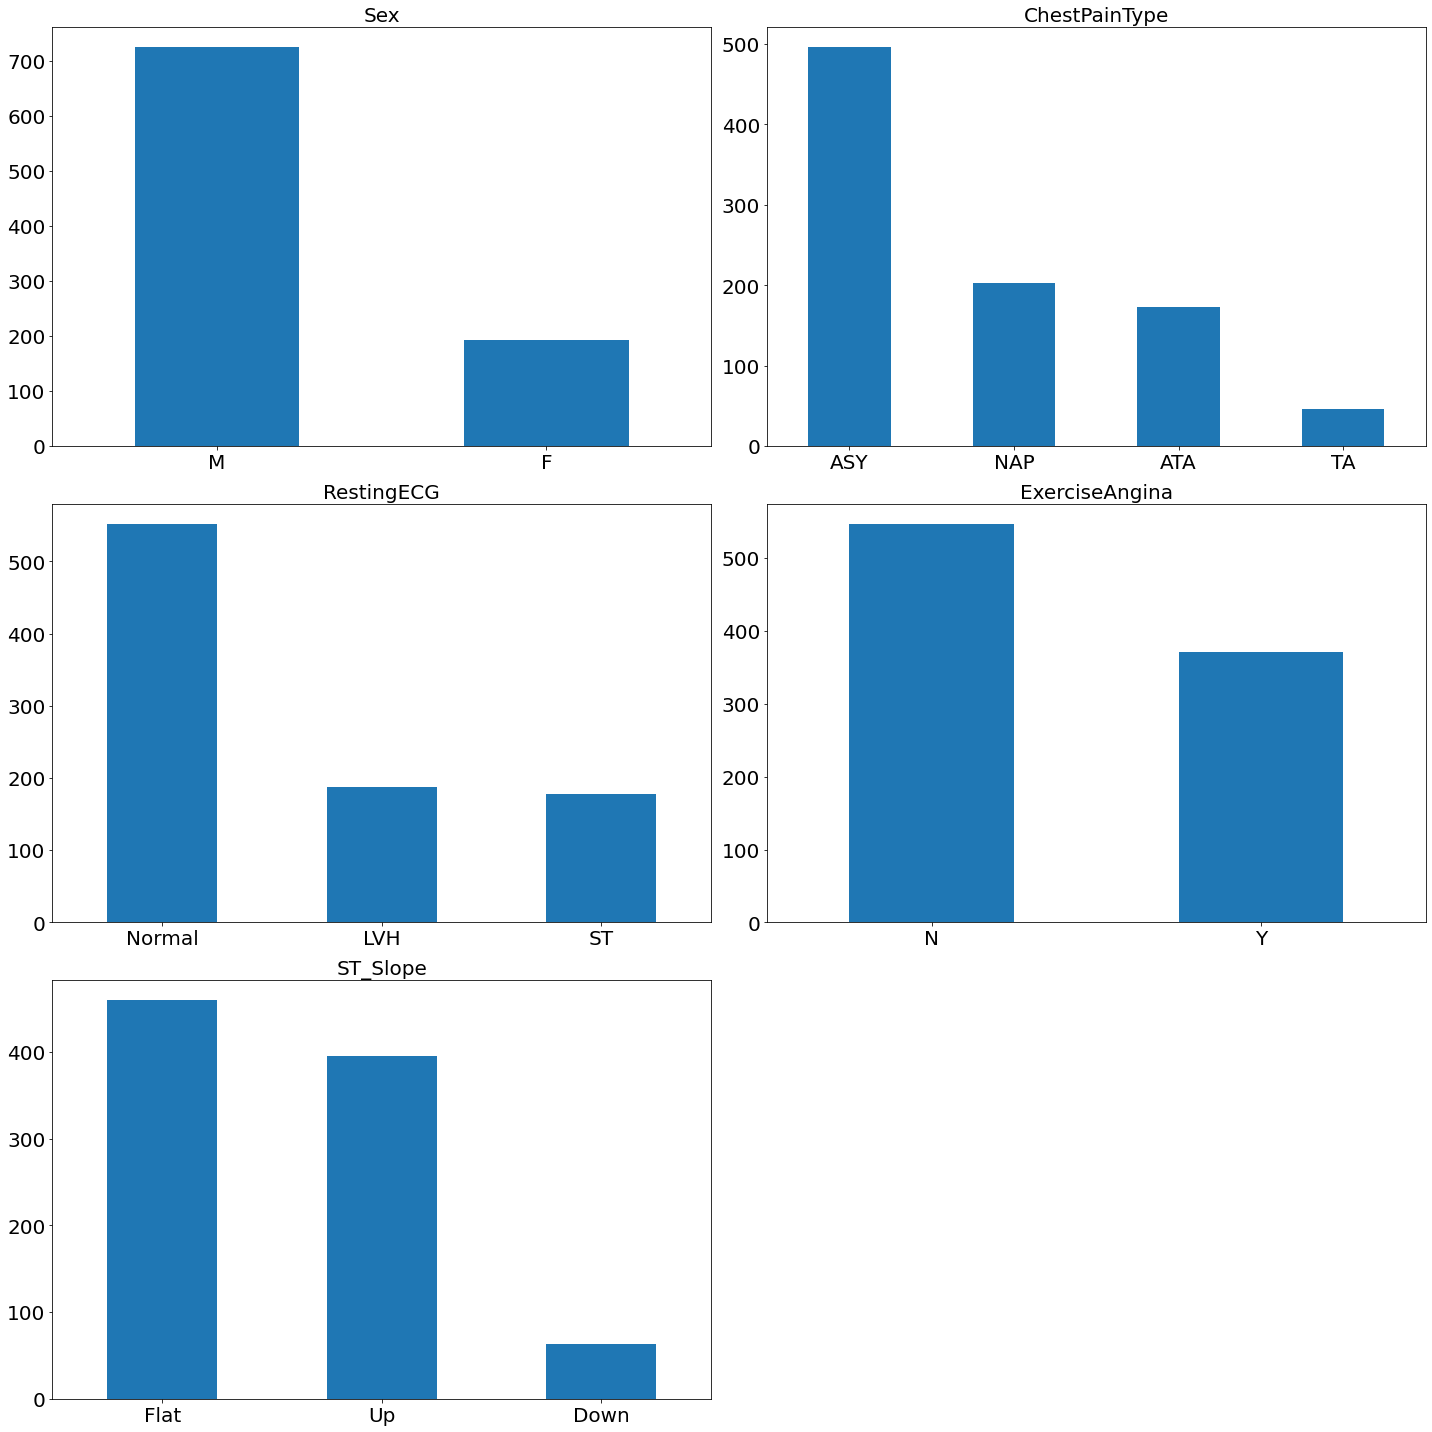

In [13]:
# Visualize the value counts of each column of type integer
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(20,20))

df["Sex"].value_counts().plot(kind="bar", figsize=(20,20), ax=ax1)
df["ChestPainType"].value_counts().plot(kind="bar", figsize=(20,20), ax=ax2)
df["RestingECG"].value_counts().plot(kind="bar", figsize=(20,20), ax=ax3)
df["ExerciseAngina"].value_counts().plot(kind="bar", figsize=(20,20), ax=ax4)
df["ST_Slope"].value_counts().plot(kind="bar", figsize=(20,20), ax=ax5)

ax1.set_title("Sex", fontsize = 20)
ax1.tick_params(labelrotation=0, labelsize=20)
ax2.set_title("ChestPainType", fontsize = 20)
ax2.tick_params(labelrotation=0, labelsize=20)
ax3.set_title("RestingECG", fontsize = 20)
ax3.tick_params(labelrotation=0, labelsize=20)
ax4.set_title("ExerciseAngina", fontsize = 20)
ax4.tick_params(labelrotation=0, labelsize=20)
ax5.set_title("ST_Slope", fontsize = 20)
ax5.tick_params(labelrotation=0, labelsize=20)

fig.delaxes(ax6)
fig.tight_layout()

In [14]:
# Count the number of male female in the dataset
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [15]:
# Calculate the mean of each integer variables based on gender
gender_group = df.groupby(["Sex"], as_index=False).mean()
gender_group

,Sex,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,F,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
1,M,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724


In [16]:
# Calculate the mean of each integer variables based on gender and ChestPainType
gender_angina_group = df.groupby(["Sex", "ExerciseAngina"], as_index=False).mean()
gender_angina_group

,Sex,ExerciseAngina,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,F,N,51.806667,129.360000,237.433333,0.113333,148.753333,0.526667,0.153333
1,F,Y,54.883721,142.162791,254.325581,0.209302,137.023256,1.165116,0.627907
2,M,N,51.846348,130.287154,188.440806,0.249370,142.992443,0.529219,0.425693
3,M,Y,56.125000,135.057927,186.390244,0.271341,123.835366,1.449390,0.881098


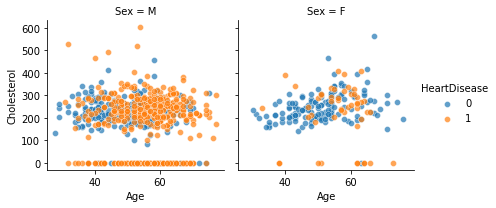

In [17]:
#Let's see the distribution of the HeartDisease based on Age and Cholesterol separted by sex 
g = sns.FacetGrid(df, col="Sex", hue="HeartDisease")
g.map(sns.scatterplot, "Age", "Cholesterol", alpha=.7)
g.add_legend()

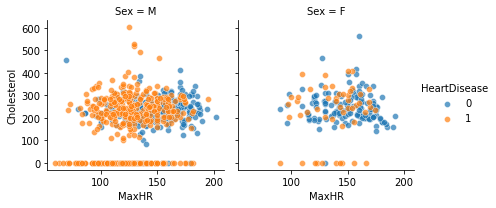

In [18]:
#Let's see the distribution of the HeartDisease based on MaxHR and Cholesterol separted by sex 
g = sns.FacetGrid(df, col="Sex", hue="HeartDisease")
g.map(sns.scatterplot, "MaxHR", "Cholesterol", alpha=.7)
g.add_legend()

Let's visualize few more dataset separated by sex.

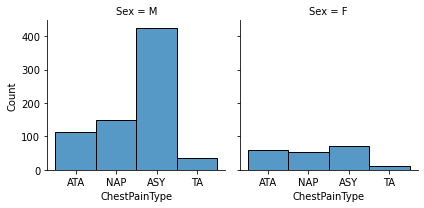

In [19]:
g = sns.FacetGrid(df, col="Sex")
g.map(sns.histplot, "ChestPainType")

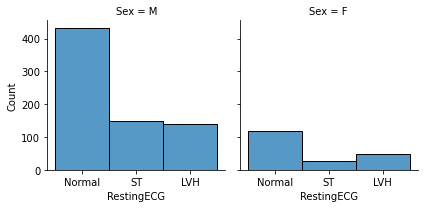

In [20]:
g = sns.FacetGrid(df, col="Sex")
g.map(sns.histplot, "RestingECG")

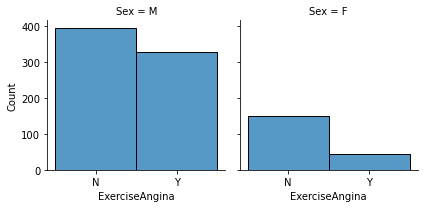

In [21]:
g = sns.FacetGrid(df, col="Sex")
g.map(sns.histplot, "ExerciseAngina")

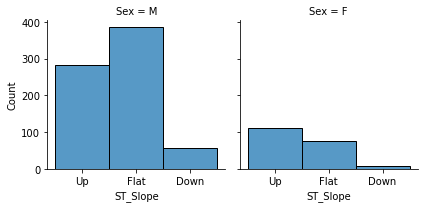

In [22]:
g = sns.FacetGrid(df, col="Sex")
g.map(sns.histplot, "ST_Slope")

From the correlation heatmap, few scatter plots and histograms, it seems that all the variables in the dataset are equally important to determine the heart disease. Therefore we will use all of the features or varibles in the dataset to determine the heart disease.

Before doing that, we need to detect and remove some outliers.

<h2>Detecting Outliers</h2>

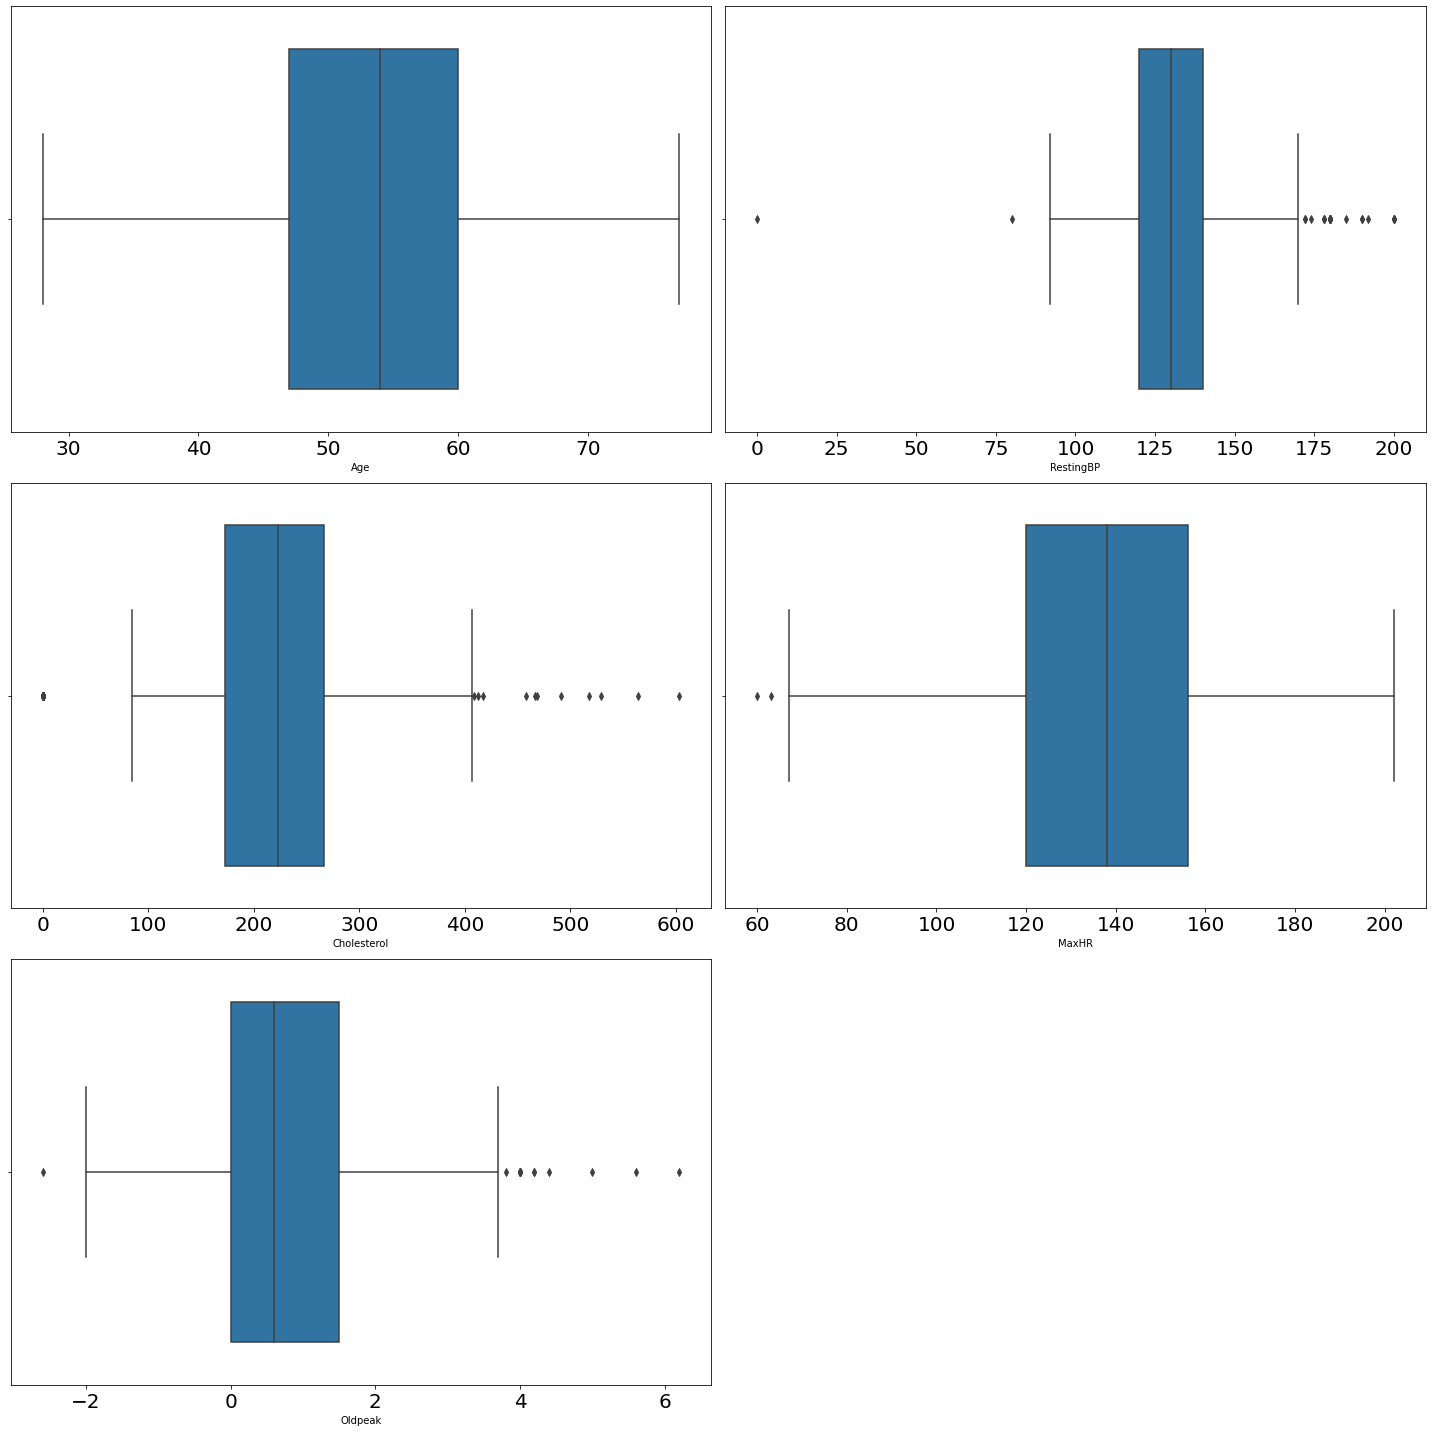

In [23]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3, 2, figsize=(20,20))
sns.boxplot(x="Age", data=df, ax=ax1)
sns.boxplot(x="RestingBP", data=df, ax=ax2)
sns.boxplot(x="Cholesterol", data=df, ax=ax3)
sns.boxplot(x="MaxHR", data=df, ax=ax4)
sns.boxplot(x="Oldpeak", data=df, ax=ax5)
ax1.tick_params(labelrotation=0, labelsize=20)
ax2.tick_params(labelrotation=0, labelsize=20)
ax3.tick_params(labelrotation=0, labelsize=20)
ax4.tick_params(labelrotation=0, labelsize=20)
ax5.tick_params(labelrotation=0, labelsize=20)
fig.delaxes(ax6)
fig.tight_layout()

We see that there are few outliers. Let's remove the outliers where it's Z-score is greater than 3 and less than -3, i.e., if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

<h3>Removing some outliers.</h3>

In [24]:
from scipy import stats
df_int2 = df[["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]]
z = np.abs(stats.zscore(df_int2))
print(z)

          Age  RestingBP  Cholesterol     MaxHR   Oldpeak
0    1.433140   0.410909     0.825070  1.382928  0.832432
1    0.478484   1.491752     0.171961  0.754157  0.105664
2    1.751359   0.129513     0.770188  1.525138  0.832432
3    0.584556   0.302825     0.139040  1.132156  0.574711
4    0.051881   0.951331     0.034755  0.581981  0.832432
..        ...        ...          ...       ...       ...
913  0.902775   1.210356     0.596393  0.188999  0.293283
914  1.536902   0.627078     0.053049  0.164684  2.357094
915  0.370100   0.129513     0.620168  0.857069  0.293283
916  0.370100   0.129513     0.340275  1.461525  0.832432
917  1.645286   0.302825     0.217696  1.422226  0.832432

[918 rows x 5 columns]


In [25]:
print(np.where(z>3))

(array([ 76, 109, 149, 166, 241, 324, 365, 390, 399, 449, 592, 616, 702,
       732, 759, 771, 791, 850, 900], dtype=int64), array([2, 1, 2, 4, 1, 4, 1, 3, 1, 1, 1, 2, 4, 1, 1, 4, 4, 4, 4],
      dtype=int64))


In [26]:
# Final data after removing some outliers
df = df[(z < 3).all(axis = 1)]
df.shape

(899, 12)

<h2>Pre-processing</h2>

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [28]:
# Create dummy variable for ChestPainType
dummy_chestPain = pd.get_dummies(df["ChestPainType"])
dummy_chestPain.head()

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [29]:
# Create dummy variable for RestingECG
dummy_restingECG = pd.get_dummies(df["RestingECG"])
dummy_restingECG.head()

,LVH,Normal,ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [30]:
# Create dummy variable for ST_Slope
dummy_stSlope = pd.get_dummies(df["ST_Slope"])
dummy_stSlope.head()

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [31]:
# Create a copy of df called df_new, then concatenate the above dummy variables into df_new. 
df_new = df.copy()
df_new = pd.concat([df_new, dummy_chestPain, dummy_restingECG, dummy_stSlope], axis=1)
df_new.drop(["ChestPainType", "RestingECG", "ST_Slope"], axis = 1, inplace=True)
df_new.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,M,140,289,0,172,N,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,F,160,180,0,156,N,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,M,130,283,0,98,N,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,F,138,214,0,108,Y,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,M,150,195,0,122,N,0.0,0,0,0,1,0,0,1,0,0,0,1


In [32]:
x = df_new.loc[:, df_new.columns != 'HeartDisease'].values
print(x.shape)
x

(899, 18)


array([[40, 'M', 140, ..., 0, 0, 1],
       [49, 'F', 160, ..., 0, 1, 0],
       [37, 'M', 130, ..., 0, 0, 1],
       ...,
       [57, 'M', 130, ..., 0, 1, 0],
       [57, 'F', 130, ..., 0, 1, 0],
       [38, 'M', 138, ..., 0, 0, 1]], dtype=object)

In [33]:
y = df_new["HeartDisease"]
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 899, dtype: int64

In [34]:
# Since we have removed some columns, the index of ExerciseAngina has changed (not 8 anymore)
df_new.columns.get_loc("ExerciseAngina")

6

In [35]:
# Covert Sex and ExcerciseAngina into dummy/indicator variables
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['M','F'])
x[:,1] = le_sex.transform(x[:,1]) 

le_angina = preprocessing.LabelEncoder()
le_angina.fit(['Y','N'])
x[:,6] = le_angina.transform(x[:,6]) 

x[0:5]

array([[40, 1, 140, 289, 0, 172, 0, 0.0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [49, 0, 160, 180, 0, 156, 0, 1.0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [37, 1, 130, 283, 0, 98, 0, 0.0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [48, 0, 138, 214, 0, 108, 1, 1.5, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [54, 1, 150, 195, 0, 122, 0, 0.0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1]],
      dtype=object)

In [36]:
# Rescaling the distribution of values so that the mean of observed values is 0 and 
# the standard deviation is 1
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.42815446,  0.515943  ,  0.46590022,  0.84963584, -0.5503622 ,
         1.38431998, -0.8229452 , -0.85546862, -1.07752387,  2.06332497,
        -0.5349047 , -0.22955001, -0.50382083,  0.80970176, -0.48989795,
        -0.26018448, -0.99888827,  1.13469459],
       [-0.47585532, -1.93819859,  1.63471366, -0.16812204, -0.5503622 ,
         0.7529728 , -0.8229452 ,  0.13751561, -1.07752387, -0.48465463,
         1.86949191, -0.22955001, -0.50382083,  0.80970176, -0.48989795,
        -0.26018448,  1.00111297, -0.88129441],
       [-1.7455875 ,  0.515943  , -0.1185065 ,  0.79361247, -0.5503622 ,
        -1.53566071, -0.8229452 , -0.85546862, -1.07752387,  2.06332497,
        -0.5349047 , -0.22955001, -0.50382083, -1.23502263,  2.04124145,
        -0.26018448, -0.99888827,  1.13469459],
       [-0.58166634, -1.93819859,  0.34901888,  0.14934372, -0.5503622 ,
        -1.14106873,  1.21514774,  0.63400773,  0.92805369, -0.48465463,
        -0.5349047 , -0.22955001, -0.50382083,  0.809

In [37]:
# Create test set and train set
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (719, 18) (719,)
Test set: (180, 18) (180,)


<h2>Training and Testing the dataset</h2>

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [39]:
# Will use this later to evaluate the cross-validation
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

<h3>Model 1: Logistic Regression</h3>

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [42]:
LR.classes_

array([0, 1], dtype=int64)

In [43]:
# Use cross-validation to get an estimate of a model’s generalization
accuracy_scores_LR = cross_val_score(LR, x_train, y_train, cv=10)
display_scores(accuracy_scores_LR)

Scores: [0.84722222 0.875      0.90277778 0.86111111 0.93055556 0.83333333
 0.875      0.80555556 0.81944444 0.83098592]
Mean: 0.8580985915492958
Standard deviation: 0.03680795586746198


In [44]:
print("Train set Accuracy: ", accuracy_score(y_train, LR.predict(x_train)))

Train set Accuracy:  0.8609179415855355


The mean accuracy scores of the cross validation is 0.86, which is very good. This is similar to the accuracy of the training set, which is also 0.86. This shows that the model is not overfit or underfit. Moreover, the standard deviation which shows how precise the estimate of the mean cross-validation is 0.04, which is small.

In [45]:
# Display the prediction result
y_hat = LR.predict(x_test)
y_hat[0:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [46]:
# Display the y_test to compare with y_hat
np.asanyarray(y_test[0:10])

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [47]:
# Use predict_proba to return estimate of class 0 (left) and class 1 (right)
yhat_prob = LR.predict_proba(x_test)
yhat_prob[0:10]

array([[0.10960705, 0.89039295],
       [0.67927451, 0.32072549],
       [0.23194186, 0.76805814],
       [0.78762532, 0.21237468],
       [0.08235361, 0.91764639],
       [0.18470805, 0.81529195],
       [0.67935864, 0.32064136],
       [0.11824069, 0.88175931],
       [0.17402191, 0.82597809],
       [0.12961603, 0.87038397]])

<h4>Logistic Regression Evaluation</h4>

In [48]:
from sklearn.metrics import jaccard_score, accuracy_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix

We can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [49]:
print("jackard_score: ",jaccard_score(y_test, y_hat))
print("log_loss: ", log_loss(y_test, yhat_prob))
print("accuracy_score: ", accuracy_score(y_test, y_hat))

jackard_score:  0.8076923076923077
log_loss:  0.33376929212094975
accuracy_score:  0.8888888888888888


In [50]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_hat)

print(cf_matrix)

[[76 13]
 [ 7 84]]


In [51]:
print("Heart disease count in y_hat:",y_hat.sum())
print("Heart disease count in y_test:",y_test.sum())

Heart disease count in y_hat: 97
Heart disease count in y_test: 91


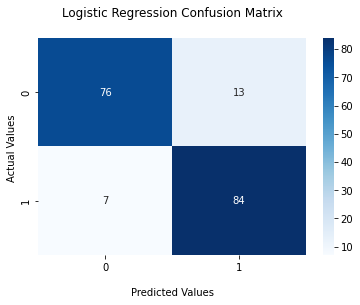

In [52]:
import seaborn as sns

#ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Logistic Regression Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [53]:
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        89
           1       0.87      0.92      0.89        91

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



__Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

__Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

__F1 score:__ for each label based on the precision and recall of that label. 
F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.89 in our case.

<h3>Model 2: Support Vector Machine (SVM)</h3>

In [54]:
from sklearn import svm

In [55]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC()

In [56]:
# Use cross-validation to get an estimate of a model’s generalization
accuracy_scores_SVM = cross_val_score(clf, x_train, y_train, cv=10)
display_scores(accuracy_scores_SVM)

Scores: [0.81944444 0.84722222 0.88888889 0.86111111 0.88888889 0.84722222
 0.86111111 0.88888889 0.86111111 0.85915493]
Mean: 0.8623043818466354
Standard deviation: 0.021038811969243214


In [57]:
print("Train set Accuracy: ", accuracy_score(y_train, clf.predict(x_train)))

Train set Accuracy:  0.9165507649513213


The mean accuracy scores of the cross validation is 0.86, which is close to the accuracy score of the training set, which is 0.91. This shows that the model is not overfit or underfit. The standard deviation of the mean cross validation is 0.02, which is considered good.

In [58]:
y_hat_svm = clf.predict(x_test)
y_hat_svm [0:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [59]:
# Display the y_test to compare with y_hat
np.asanyarray(y_test[0:10])

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

<h4>Support Vector Machine Evaluation</h4>

In [60]:
print("jackard_score: ",jaccard_score(y_test, y_hat_svm))
print("accuracy_score: ", accuracy_score(y_test, y_hat_svm))

jackard_score:  0.7981651376146789
accuracy_score:  0.8777777777777778


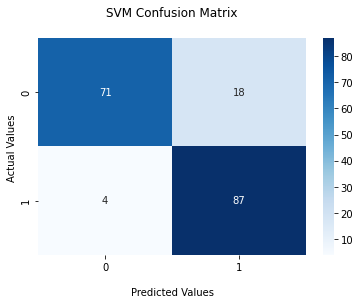

In [61]:
cf_matrix_svm = confusion_matrix(y_test, y_hat_svm)
ax = sns.heatmap(cf_matrix_svm, annot=True, cmap='Blues')

ax.set_title('SVM Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [62]:
print (classification_report(y_test, y_hat_svm))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87        89
           1       0.83      0.96      0.89        91

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



<h3>Model 3: Random Forest Classifier</h3>

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
# Use cross-validation to get an estimate of a model’s generalization
accuracy_scores_frt = cross_val_score(forest, x_train, y_train, cv=10)
display_scores(accuracy_scores_frt)

Scores: [0.80555556 0.86111111 0.91666667 0.88888889 0.875      0.83333333
 0.84722222 0.875      0.86111111 0.88732394]
Mean: 0.8651212832550861
Standard deviation: 0.029700253989681773


In [66]:
print("Train set Accuracy: ", accuracy_score(y_train, forest.predict(x_train)))

Train set Accuracy:  1.0


The mean accuracy scores of the cross validation is 0.87. However, the accuracy score of the training set, which is 1.0. This shows that the model is a little overfit. The standard deviation of the mean cross validation is 0.03, which is considered good.

In [67]:
y_hat_frt = forest.predict(x_test)
y_hat_frt [0:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [68]:
# Display the y_test to compare with y_hat
np.asanyarray(y_test[0:10])

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

<h4>Random Forest Classifier Evaluation</h4>

In [69]:
print("jackard_score: ",jaccard_score(y_test, y_hat_frt))
print("accuracy_score: ", accuracy_score(y_test, y_hat_frt))

jackard_score:  0.7962962962962963
accuracy_score:  0.8777777777777778


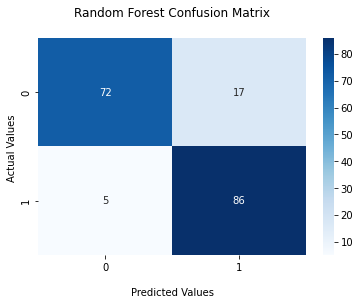

In [70]:
cf_matrix_frt = confusion_matrix(y_test, y_hat_frt)
ax = sns.heatmap(cf_matrix_frt, annot=True, cmap='Blues')

ax.set_title('Random Forest Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [71]:
print (classification_report(y_test, y_hat_frt))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        89
           1       0.83      0.95      0.89        91

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



<h2>Summary</h2>

| Algorithm          | Jaccard | F1-score | Accuracy |LogLoss |
| ------------------ | ------- | -------- | -------  | -------|
| LogisticRegression | 0.81    | 0.89     | 0.89     |   0.33 |
| SVM                | 0.80    | 0.88     | 0.88     |   NA   |
| Random Forest      | 0.80    | 0.88     | 0.88     |   NA   |


It seems that Logistic Regression, SVM, and Random Forest have about the same performance. Their accuracy in predicting the heart failure is very good. Therefore, all of them are a good candidate for predicting heart failure. 